In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_final = pd.read_csv("Wii_clean.csv")

In [4]:
df_final.head()

,Unnamed: 0,label,age,sex,grip_r1,grip_l1,health_rating,crouching_difficulty,lifting_difficulty,reaching_overhead_difficulty,...,difficult_bathing,has_fallen,has_near_fallen,near_fall_count,trial_1_eyes_closed_feet_apart_velocity_0_1,trial_1_eyes_closed_feet_apart_velocity_0_2,trial_1_eyes_closed_feet_apart_velocity_0_3,trial_2_eyes_open_feet_together_velocity_0_1,trial_2_eyes_open_feet_together_velocity_0_2,trial_2_eyes_open_feet_together_velocity_0_3
0,0,0,79,1,34.0,28.0,3,0,0,0,...,0,0,1,5,79.722943,44.834942,78.966318,93.734461,41.016907,56.524029
1,1,0,70,1,44.0,40.0,3,1,0,0,...,0,1,1,10,28.586327,25.947429,18.514792,426.844332,280.273441,232.600307
2,2,0,76,1,26.0,26.0,3,0,0,0,...,0,0,0,0,47.820729,28.815425,33.684368,61.064392,44.862344,30.107110
3,3,0,86,1,18.0,16.0,3,2,0,0,...,0,0,0,0,36.865308,59.605334,34.759861,32.003350,59.176302,54.517892
4,4,0,75,1,40.0,42.0,4,1,0,0,...,0,0,1,2,30.388833,36.350520,53.308239,86.482268,45.903797,30.148599


In [6]:
# Dropping first column (redundant)
df_final = df_final.drop('Unnamed: 0', axis=1)

In [25]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 24 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   label                                         200 non-null    int64  
 1   age                                           200 non-null    int64  
 2   sex                                           200 non-null    int64  
 3   grip_r1                                       200 non-null    float64
 4   grip_l1                                       200 non-null    float64
 5   health_rating                                 200 non-null    int64  
 6   crouching_difficulty                          200 non-null    int64  
 7   lifting_difficulty                            200 non-null    int64  
 8   reaching_overhead_difficulty                  200 non-null    int64  
 9   walking_difficulty                            200 non-null    int

In [12]:
# New feature: difference between grip strength from left to right hands (absolute values)
df_final['grip_difference'] = abs(df_final['grip_r1'] - df_final['grip_l1'])

In [13]:
# New feature: average grip strength between left and right hands
df_final['avg_grip_strength'] = (df_final['grip_r1'] + df_final['grip_l1'])/2

In [14]:
df_final.head()

,label,age,sex,grip_r1,grip_l1,health_rating,crouching_difficulty,lifting_difficulty,reaching_overhead_difficulty,walking_difficulty,...,has_near_fallen,near_fall_count,trial_1_eyes_closed_feet_apart_velocity_0_1,trial_1_eyes_closed_feet_apart_velocity_0_2,trial_1_eyes_closed_feet_apart_velocity_0_3,trial_2_eyes_open_feet_together_velocity_0_1,trial_2_eyes_open_feet_together_velocity_0_2,trial_2_eyes_open_feet_together_velocity_0_3,avg_grip_strength,grip_difference
0,0,79,1,34.0,28.0,3,0,0,0,0,...,1,5,79.722943,44.834942,78.966318,93.734461,41.016907,56.524029,31.0,6.0
1,0,70,1,44.0,40.0,3,1,0,0,0,...,1,10,28.586327,25.947429,18.514792,426.844332,280.273441,232.600307,42.0,4.0
2,0,76,1,26.0,26.0,3,0,0,0,0,...,0,0,47.820729,28.815425,33.684368,61.064392,44.862344,30.107110,26.0,0.0
3,0,86,1,18.0,16.0,3,2,0,0,0,...,0,0,36.865308,59.605334,34.759861,32.003350,59.176302,54.517892,17.0,2.0
4,0,75,1,40.0,42.0,4,1,0,0,0,...,1,2,30.388833,36.350520,53.308239,86.482268,45.903797,30.148599,41.0,2.0


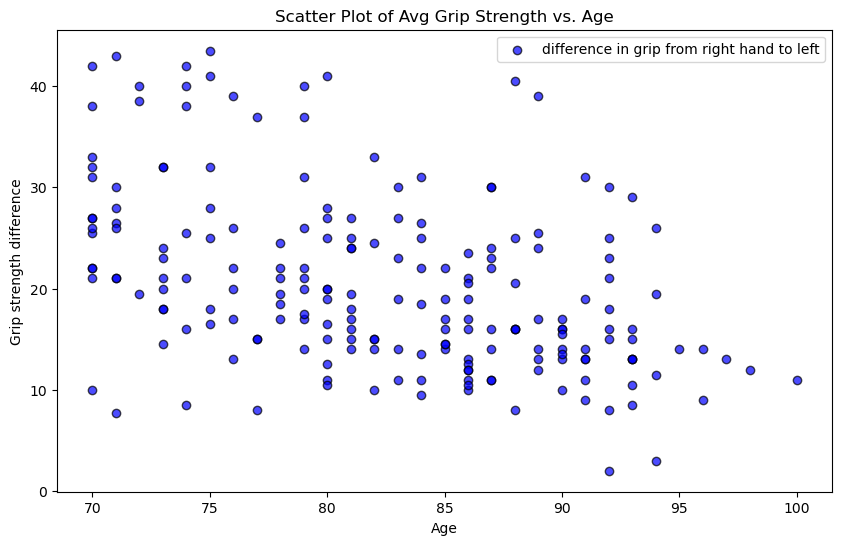

In [22]:
plt.figure(figsize=(10, 6))  # Create a figure with a specified size

# Create scatter plot
plt.scatter(df_final['age'], 
            df_final['avg_grip_strength'], 
            color='blue', 
            alpha=0.7, 
            edgecolors='k', 
            label='difference in grip from right hand to left')

# Set title and labels
plt.title('Scatter Plot of Avg Grip Strength vs. Age')
plt.xlabel('Age')
plt.ylabel('Grip strength difference')
plt.legend()
plt.show()


In [20]:
grouped_mean_grip_avg = df_final.groupby('has_fallen')['avg_grip_strength'].mean()


NameError: name 'counts' is not defined

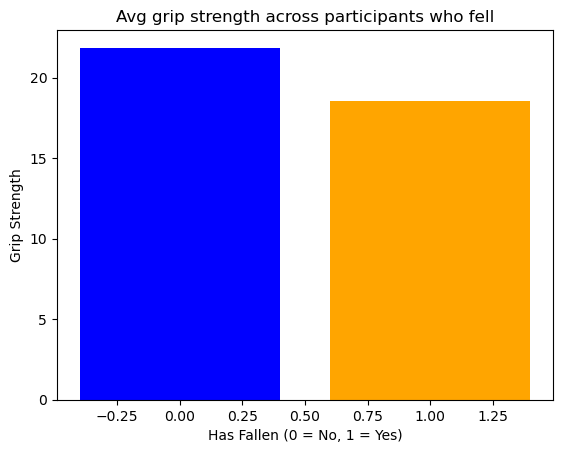

In [21]:
plt.figure()
plt.bar(grouped_mean_grip_avg.index, grouped_mean_grip_avg.values, color=['blue', 'orange'])
plt.title('Avg grip strength across participants who fell')
plt.xlabel('Has Fallen (0 = No, 1 = Yes)')
plt.ylabel('Grip Strength')
plt.xticks(counts.index, ['No', 'Yes'])
plt.savefig('grip_vs_fall.png')
plt.show()

In [26]:
df_final.to_csv('Wii_final.csv')